#**CARACTERIZACIÓN, CREACIÓN DE DATASET Y LECTURA**

***IABO - Inteligencia Artificial de Borde***

Javier Chaparro

#**Caracterización de las señales de la IMU**

En esta primera parte se hace una explicación de la forma de crear un dataset a partir de señales de un sensor inercial embebido en un SoC 33BLEsense desde un archivo de Excel.

Lectura de los datos de archivo de excel

Archivos recomendados: 
1. IMU_ladrilloA0.xlsx
2. IMU_pastoA2.xlsx
3. IMU_piedraA0.xlsx
4. IMU_arenaA0.xlsx

Clonación del repositorio donde esta el archivo de excel con las señales de la IMU

In [ ]:
!git clone https://github.com/jchaparrop75/PISOS_simulados.git

Cloning into 'PISOS_simulados'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


Librerias necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

In [ ]:
def lectura(archivo, AX,AY,AZ,GX,GY,GZ):
  wb=xlrd.open_workbook(archivo)
  sheet = wb.sheet_by_index(0)
  ax=sheet.col_values(0)
  ay=sheet.col_values(1)
  az=sheet.col_values(2)
  gx=sheet.col_values(3)
  gy=sheet.col_values(4)
  gz=sheet.col_values(5)
  AX=np.append(AX,ax)
  AY=np.append(AY,ay)
  AZ=np.append(AZ,az)
  GX=np.append(GX,gx)
  GY=np.append(GY,gy)
  GZ=np.append(GZ,gz)
  return AX,AY,AZ,GX,GY,GZ

Caracterizazión de las señales del acelerómetro y giroscopio obtenidas de la IMU mediante:


1.   **Varianza**
2.   Entropia (pendiente)



Parámetros para la segmentación de la señal y su caracterización

In [ ]:
N=10                    # Número de muestras
nV=np.array(np.shape(AX))   # Número de muestras de la señal
segment = np.floor(nV/N)    # Número de segmetos de la señal
print("Segmentos : ",segment)

Segmentos :  [250.]


Segmentación y cálculo de la varianza de señales de la clase PIEDRA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


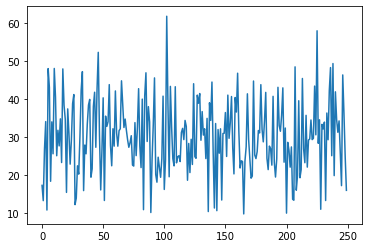

In [ ]:
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Piedra/IMU_piedraA0Sim.xlsx",0.0,0.0,0.0,0.0,0.0,0.0)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Piedra/IMU_piedraA1Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Piedra/IMU_piedraA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Piedra/IMU_piedraA3Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Piedra/IMU_piedraA4Sim.xlsx",AX,AY,AZ,GX,GY,GZ)

var_ventana_axPI=[]
var_ventana_ayPI=[]
var_ventana_azPI=[]
var_ventana_gxPI=[]
var_ventana_gyPI=[]
var_ventana_gzPI=[]

for i in range (0,np.int(segment)):
  var_ventana_axPI.append(np.var(AX[int(i*N):int((i+1)*N)]))
  var_ventana_ayPI.append(np.var(AY[int(i*N):int((i+1)*N)]))
  var_ventana_azPI.append(np.var(AZ[int(i*N):int((i+1)*N)]))
  var_ventana_gxPI.append(np.var(GX[int(i*N):int((i+1)*N)]))
  var_ventana_gyPI.append(np.var(GY[int(i*N):int((i+1)*N)]))
  var_ventana_gzPI.append(np.var(GZ[int(i*N):int((i+1)*N)]))
  #print(i,len(var_ventana_gyPI))
plt.plot(var_ventana_gxPI)

Segmentación y cálculo de la varianza de señales de la clase PASTO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


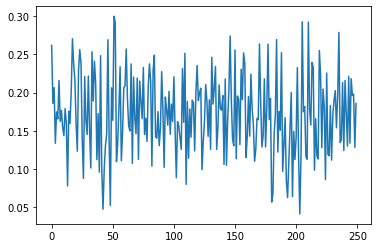

In [ ]:
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Pasto/IMU_pastoA0Sim.xlsx",0,0,0,0,0,0)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Pasto/IMU_pastoA1Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Pasto/IMU_pastoA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Pasto/IMU_pastoA3Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Pasto/IMU_pastoA4Sim.xlsx",AX,AY,AZ,GX,GY,GZ)

#Vector de características
var_ventana_axPA=[]
var_ventana_ayPA=[]
var_ventana_azPA=[]
var_ventana_gxPA=[]
var_ventana_gyPA=[]
var_ventana_gzPA=[]

for i in range (0,np.int(segment)):
  var_ventana_axPA.append(np.var(AX[int(i*N):int((i+1)*N)]))
  var_ventana_ayPA.append(np.var(AY[int(i*N):int((i+1)*N)]))
  var_ventana_azPA.append(np.var(AZ[int(i*N):int((i+1)*N)]))
  var_ventana_gxPA.append(np.var(GX[int(i*N):int((i+1)*N)]))
  var_ventana_gyPA.append(np.var(GY[int(i*N):int((i+1)*N)]))
  var_ventana_gzPA.append(np.var(GZ[int(i*N):int((i+1)*N)]))
plt.plot(var_ventana_azPA)

Segmentación y cálculo de la varianza de señales de la clase LADRILLO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


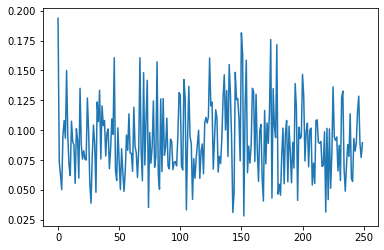

In [ ]:
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Ladrillo/IMU_ladrilloA0Sim.xlsx",0,0,0,0,0,0)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Ladrillo/IMU_ladrilloA1Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Ladrillo/IMU_ladrilloA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Ladrillo/IMU_ladrilloA3Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Ladrillo/IMU_ladrilloA4Sim.xlsx",AX,AY,AZ,GX,GY,GZ)

var_ventana_axLA=[]
var_ventana_ayLA=[]
var_ventana_azLA=[]
var_ventana_gxLA=[]
var_ventana_gyLA=[]
var_ventana_gzLA=[]
for i in range (0,np.int(segment)):
  var_ventana_axLA.append(np.var(AX[int(i*N):int((i+1)*N)]))
  var_ventana_ayLA.append(np.var(AY[int(i*N):int((i+1)*N)]))
  var_ventana_azLA.append(np.var(AZ[int(i*N):int((i+1)*N)]))
  var_ventana_gxLA.append(np.var(GX[int(i*N):int((i+1)*N)]))
  var_ventana_gyLA.append(np.var(GY[int(i*N):int((i+1)*N)]))
  var_ventana_gzLA.append(np.var(GZ[int(i*N):int((i+1)*N)]))
plt.plot(var_ventana_azLA)

Segmentación y cálculo de la varianza de señales de la clase ASFALTO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


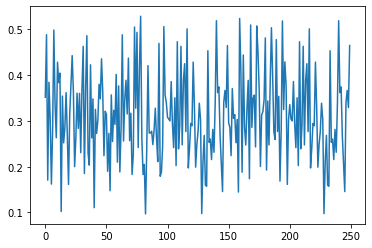

In [ ]:
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Asfalto/IMU_asfaltoA0Sim.xlsx",0,0,0,0,0,0)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Asfalto/IMU_asfaltoA1Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Asfalto/IMU_asfaltoA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Asfalto/IMU_asfaltoA3Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Asfalto/IMU_asfaltoA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)

var_ventana_axAS=[]
var_ventana_ayAS=[]
var_ventana_azAS=[]
var_ventana_gxAS=[]
var_ventana_gyAS=[]
var_ventana_gzAS=[]

for i in range (0,np.int(segment)):
  var_ventana_axAS.append(np.var(AX[int(i*N):int((i+1)*N)]))
  var_ventana_ayAS.append(np.var(AY[int(i*N):int((i+1)*N)]))
  var_ventana_azAS.append(np.var(AZ[int(i*N):int((i+1)*N)]))
  var_ventana_gxAS.append(np.var(GX[int(i*N):int((i+1)*N)]))
  var_ventana_gyAS.append(np.var(GY[int(i*N):int((i+1)*N)]))
  var_ventana_gzAS.append(np.var(GZ[int(i*N):int((i+1)*N)]))
plt.plot(var_ventana_axAS)

Segmentación y cálculo de la varianza de señales de la clase ARENA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


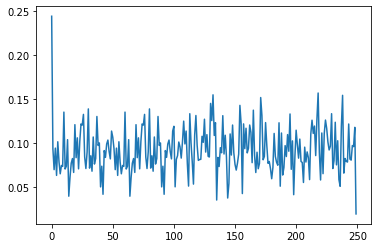

In [ ]:
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Arena/IMU_arenaA0Sim.xlsx",0,0,0,0,0,0)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Arena/IMU_arenaA1Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Arena/IMU_arenaA2Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Arena/IMU_arenaA3Sim.xlsx",AX,AY,AZ,GX,GY,GZ)
AX,AY,AZ,GX,GY,GZ=lectura("/content/PISOS_simulados/Arena/IMU_arenaA4Sim.xlsx",AX,AY,AZ,GX,GY,GZ)

var_ventana_axAR=[]
var_ventana_ayAR=[]
var_ventana_azAR=[]
var_ventana_gxAR=[]
var_ventana_gyAR=[]
var_ventana_gzAR=[]
N=10
for i in range (0,np.int(segment)):
  ventana_axAR=AX[int(i*N):int((i+1)*N)]
  ventana_ayAR=AY[int(i*N):int((i+1)*N)]
  ventana_azAR=AZ[int(i*N):int((i+1)*N)]
  ventana_gxAR=GX[int(i*N):int((i+1)*N)]
  ventana_gyAR=GY[int(i*N):int((i+1)*N)]
  ventana_gzAR=GZ[int(i*N):int((i+1)*N)]
  var_ventana_axAR.append(np.var(AX[int(i*N):int((i+1)*N)]))
  var_ventana_ayAR.append(np.var(AY[int(i*N):int((i+1)*N)]))
  var_ventana_azAR.append(np.var(AZ[int(i*N):int((i+1)*N)]))
  var_ventana_gxAR.append(np.var(GX[int(i*N):int((i+1)*N)]))
  var_ventana_gyAR.append(np.var(GY[int(i*N):int((i+1)*N)]))
  var_ventana_gzAR.append(np.var(GZ[int(i*N):int((i+1)*N)]))
plt.plot(var_ventana_azAR)

Creación del vector de clases de los dos grupos

In [ ]:
N=np.size(var_ventana_ayPI)
clases=[]
#clasePI=[]
for n in range(N):
  clases.append(0)
#N=np.size(var_ventana_ayPA)
for n in range(N):
  clases.append(1)
#N=np.size(var_ventana_ayPA)
for n in range(N):
  clases.append(2)
#N=np.size(var_ventana_ayPA)
for n in range(N):
  clases.append(3)
#N=np.size(var_ventana_ayPA)
for n in range(N):
  clases.append(4)

clases=np.transpose(clases)
print(clases)
print(len(clases))

[0 0 0 ... 4 4 4]
1250


#**Creación de Dataset**

Teniendo las características anteriores se crea el Dataset  a partir de un Dataframe

In [ ]:
# Unión de las dos características anteriores
caracteristica1=var_ventana_axAR+var_ventana_axAS+var_ventana_axLA+var_ventana_axPA+var_ventana_axPI
caracteristica2=var_ventana_ayAR+var_ventana_ayAS+var_ventana_ayLA+var_ventana_ayPA+var_ventana_ayPI
caracteristica3=var_ventana_azAR+var_ventana_azAS+var_ventana_azLA+var_ventana_azPA+var_ventana_azPI
caracteristica4=var_ventana_gxAR+var_ventana_gxAS+var_ventana_gxLA+var_ventana_gxPA+var_ventana_gxPI
caracteristica5=var_ventana_gyAR+var_ventana_gyAS+var_ventana_gyLA+var_ventana_gyPA+var_ventana_gyPI
caracteristica6=var_ventana_gzAR+var_ventana_gzAS+var_ventana_gzLA+var_ventana_gzPA+var_ventana_gzPI

caracteristicas=[caracteristica1,caracteristica2,caracteristica1,caracteristica2,caracteristica1,caracteristica2]
caracteristicas=np.array(np.transpose(caracteristicas))
print(np.shape(caracteristicas))

(1250, 6)


Creación de archivo de Excel con las características y clases

In [ ]:
# Creación del DataFrame
import pandas as pd

datos={'Varianza_aX': caracteristica1,
       'Varianza_aY': caracteristica2,
       'Varianza_aZ': caracteristica3,
       'Aceleracion_aX': caracteristica4,
       'Aceleracion_aY': caracteristica5,
       'Aceleracion_aZ': caracteristica6,
       'Suelo':clases}

datosDF=pd.DataFrame(datos)
print(datosDF)

In [ ]:
#Creación del archivo de Excel
datosDF.to_excel("caracteristicas.xlsx")

#**Clonación del repositorio**

Se hace la clonación del respositorio público ubicado en gitHub.

In [ ]:
#!rm -rf '/content/IABO'

In [ ]:
# Si es necesario se clona nuevamente el respositorio
!git clone https://github.com/jchaparrop75/PISOS_simulados.git

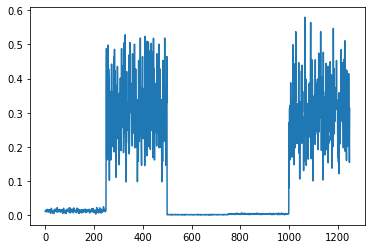

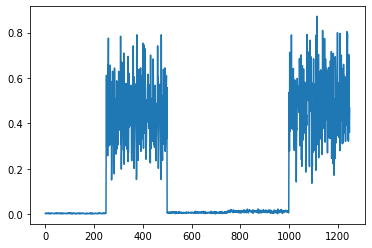

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("/content/caracteristicas.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(1,start_rowx=1)
ay=sheet.col_values(2,start_rowx=1)
az=sheet.col_values(3,start_rowx=1)
gx=sheet.col_values(4,start_rowx=1)
gy=sheet.col_values(5,start_rowx=1)
gz=sheet.col_values(6,start_rowx=1)

clases=np.array(sheet.col_values(7,start_rowx=1))
plt.plot(ax)
plt.figure()
plt.plot(ay)

In [ ]:
print(clases)

[0. 0. 0. ... 4. 4. 4.]


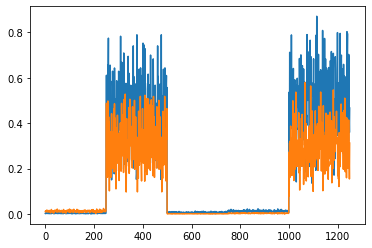

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array([ay,ax])
X=X.transpose()
plt.plot(X)

División del dataset

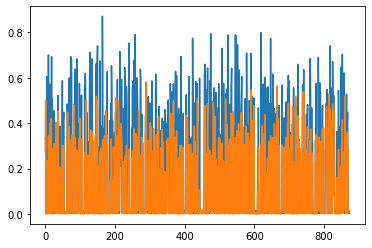

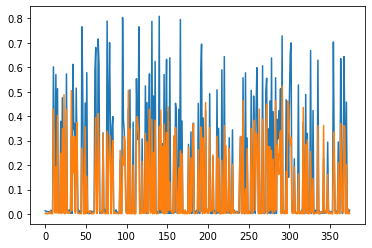

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,clases,test_size=0.3)
plt.plot(X_train)
plt.figure()
plt.plot(X_test)

Text(0, 0.5, 'Ancho del Pétalo')

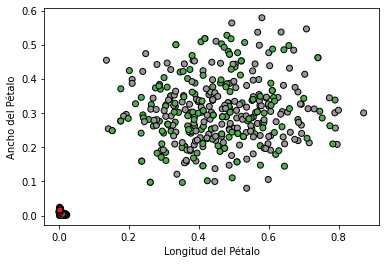

In [ ]:
# GRÁFICA DE BASE DE DATOS (2 variables)
plt.scatter(X_train[:, 0], X_train[:,1], c=Y_train, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Longitud del Pétalo')
plt.ylabel('Ancho del Pétalo')

Prueba de clasificadores

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# DISEÑO Y ENTRENAMIENTO DEL CLASIFICADOR
vecinosTrain = KNeighborsClassifier(n_neighbors=4)
vecinosTrain.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# EVALUACIÓN DEL MODELO
clasificacion= vecinosTrain.predict(X_test)
mat_con=confusion_matrix(Y_test,clasificacion)
print(mat_con)
print(accuracy_score(Y_test,clasificacion))

[[74  0  0  0  0]
 [ 0 49  0  0 24]
 [ 0  0 81  0  0]
 [ 2  0  8 79  0]
 [ 0 30  0  0 28]]
0.8293333333333334
